In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [3]:
cancer_data = load_breast_cancer()

In [4]:
df_features = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df_target = pd.DataFrame(cancer_data['target'], columns=['Cancer'])

In [5]:
print("Feature Head:")
print(df_features.head())

Feature Head:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  

In [7]:
print("\nTarget:\n0 = Malignant, 1 = Benign")
print(df_target['Cancer'].value_counts())


Target:
0 = Malignant, 1 = Benign
Cancer
1    357
0    212
Name: count, dtype: int64


In [8]:
X = df_features
y = df_target['Cancer']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [10]:
linear_svm_model = SVC(kernel='linear', C=1)

In [11]:
linear_svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [12]:
predictions_linear = linear_svm_model.predict(X_test)

In [13]:
print("\nConfusion Matrix:")
cm_linear = confusion_matrix(y_test, predictions_linear)
print(cm_linear)


Confusion Matrix:
[[ 60   6]
 [  3 102]]


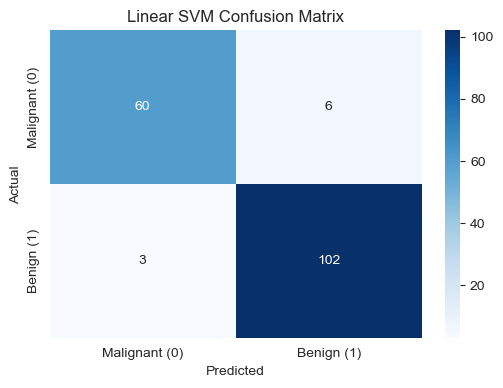

In [14]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Malignant (0)', 'Benign (1)'], 
            yticklabels=['Malignant (0)', 'Benign (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Linear SVM Confusion Matrix')
plt.show()

In [15]:
print("\nClassification Report:")
print(classification_report(y_test, predictions_linear))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        66
           1       0.94      0.97      0.96       105

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [16]:
rbf_svm_model = SVC(kernel='rbf', C=1)
rbf_svm_model.fit(X_train, y_train)

SVC(C=1)

In [17]:
predictions_rbf = rbf_svm_model.predict(X_test)

In [18]:
print("\n--- Evaluation for RBF SVM ---")
print("\nConfusion Matrix (RBF):")
print(confusion_matrix(y_test, predictions_rbf))
print("\nClassification Report (RBF):")
print(classification_report(y_test, predictions_rbf))


--- Evaluation for RBF SVM ---

Confusion Matrix (RBF):
[[ 56  10]
 [  3 102]]

Classification Report (RBF):
              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



In [19]:
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

In [20]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=3)

In [21]:
print("\n--- Starting GridSearchCV (Hyperparameter Tuning) ---")
grid.fit(X_train, y_train)


--- Starting GridSearchCV (Hyperparameter Tuning) ---
Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time= 

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [22]:
print(f"Best Parameters Found: {grid.best_params_}")

Best Parameters Found: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [23]:
grid_predictions = grid.predict(X_test)

In [24]:
print("\nConfusion Matrix (Tuned RBF):")
print(confusion_matrix(y_test, grid_predictions))
print("\nClassification Report (Tuned RBF):")
print(classification_report(y_test, grid_predictions))


Confusion Matrix (Tuned RBF):
[[ 59   7]
 [  5 100]]

Classification Report (Tuned RBF):
              precision    recall  f1-score   support

           0       0.92      0.89      0.91        66
           1       0.93      0.95      0.94       105

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.93      0.93      0.93       171

